In [1]:
#  import libraries
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data set path
# Acute myeloid leukemia

# cancerDisease = './one-acute-myeloid-leukemia/AML_UNB_SW_GSE116256.h5ad'
# cellType = './one-acute-myeloid-leukemia/cell-type.csv'
# outputfile = './one-acute-myeloid-leukemia/piegraph.png'


# Bladder Urothelial Carcinoma 

#one
# cancerDisease = './three-bladdercarc/BLC_T_10X_GSE149652.h5ad'
# cellType = './three-bladdercarc/cell-type.csv'
# outputfile = './three-bladdercarc/piegraph.png'

#two
# cancerDisease = './three-bladdercarc/BLC_UNB_10X_GSE145140.h5ad'
# cellType = './three-bladdercarc/cell-type.csv'
# outputfile = './three-bladdercarc/piegraph.png'


# Breast Ductal Carcinoma

cancerDisease = './breast-cancer/HTAPP-783-SMP-4081_scRNAseq_processed.h5ad'
cellType = './breast-cancer/cell-type.csv'
outputfile = './breast-cancer/piegraph.png'

# Eight : Colorectal Adenocarcinoma 
# cancerDisease = './eight/CRC_T_SS2_GSE108989.h5ad'
# cellType = './eight/cell-type.csv'
# outputfile = './eight/piegraph.png'


# #  Nine : Esophageal Carcinoma 
# cancerDisease = './nine/ESCA_MYE_MIX_GSE154763.h5ad'
# cellType = './nine/cell-type.csv'
# outputfile = './nine/piegraph.png'

#  Nine : Esophageal Carcinoma 
# cancerDisease = './ten/GBM_UNB_SS2_GSE84465.h5ad'
# cellType = './ten/cell-type.csv'
# outputfile = './ten/piegraph.png'




In [3]:
scData =  sc.read_h5ad(cancerDisease)
scData

AnnData object with n_obs × n_vars = 2276 × 5000
    obs: 'replicate', 'condition', 'cell_type', 'labels_unif', 'labels_cl_unif', 'labels_cl_unif2_broad', 'compartments', 'cnv_pass_mal', 'Phase', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'total_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'mean', 'std'
    uns: 'cell_type_colors', 'counts_var', 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'counts'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
# processing data to get statistics of cell types

# scData =  sc.read_h5ad(cancerDisease)
cell_types_counts = scData.obs['cell_type'].value_counts()

In [5]:
cell_types_counts

cell_type
MBC            1152
Fibroblast      371
T               276
Endothelial     256
Macrophage      167
Mast             39
B_plasma         14
NK                1
Name: count, dtype: int64

In [6]:
cell_types = pd.DataFrame(cell_types_counts)
cell_types.to_csv(cellType, header=True)

In [5]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        #return f'{pct:.1f}%\n({val})'  # Show percentage and count
        return f'({val})'  # Show percentage and count
    return my_format

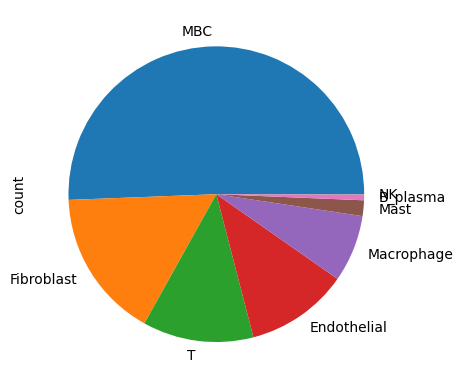

In [7]:
# piecharts

cell_types_counts.plot(kind='pie')
# plt.xlabel('Cell Type')
# plt.ylabel('Number of Cells')
# plt.title('Distribution of Cell Types')
plt.gca().set_aspect('equal')
plt.savefig(outputfile, format='png') # to save cell type in png file
plt.show()

In [9]:


#step to draw cluster


# sc.pp.normalize_total(scData, target_sum=1e4)
# sc.pp.log1p(scData)
# sc.pp.highly_variable_genes(scData, n_top_genes=2000)

/home/javeed/miniconda3/envs/sc-rna/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/javeed/miniconda3/envs/sc-rna/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:384: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan],
      dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

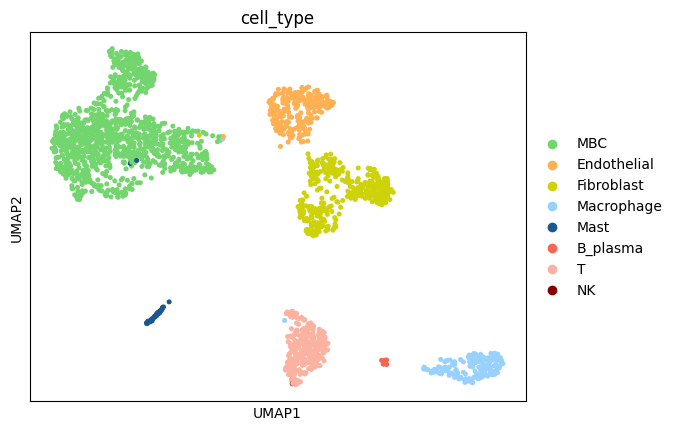

In [10]:
sc.pl.umap(scData, color=['cell_type'])